# Symmetrization of correlations on the lattice

The pyALF analysis offers an option to symmetrize correlation functions, by averaging over a list of symmetry operations on the Bravais lattice. This feature is meant to be used as an improved estimator, meaning to explicitly restore a symmetry of the model lost due to imperfect sampling, to increase the quality of the data.

For this feature, the user has to supply a list of functions $f_i$, taking as arguments an instance of {class}`py_alf.Lattice` and an integer corresponding to a $\boldsymbol{k}$-point of the Bravais lattice and returning an integer corresponding to the transformed $\boldsymbol{k}$-point of the Bravais lattice. The analysis then averages the correlation over all transformations:

$$
\tilde{C}(n_{\boldsymbol{k}}) = \frac{1}{N} \sum_{i=1}^{N} C \left( f_i(latt, n_{\boldsymbol{k}}) \right)
$$

```{note}
This symmetrization feature does not affect custom observables, but only the default analysis. Improved estimators would have to be included directly in the definition of custom observables.
```

This demonstration begins, as usual, with some imports:

In [1]:
# Enable Matplotlib Jupyter Widget Backend
%matplotlib widget

import numpy as np                      # Numerical libary
import matplotlib.pyplot as plt         # Plotting library
from py_alf.analysis import analysis    # Analysis function
from py_alf.ana import load_res         # Function for loading analysis results
from py_alf import Lattice              # Defines Bravais lattice object
from custom_obs import custom_obs       # Custom observable specifications
                                        # from local file custom_obs.py 

The Hubbard model on a square lattice possesses a fourfold rotation symmetry ($=C_4$ symmetry). To restore this symmetry, a list of all possible realizations of it has to be handed to the analysis. These are: rotation by 0 or $2\pi$ ($=\text{identity}$), rotation by $\pi/2$, rotation by $\pi$ and rotation by $3\pi/2$.

In [2]:
# Define list of transformations (Lattice, i) -> new_i
# Default analysis will average over all listed elements
def sym_c4_0(latt, i): return i
def sym_c4_1(latt, i): return latt.rotate(i, np.pi*0.5)
def sym_c4_2(latt, i): return latt.rotate(i, np.pi)
def sym_c4_3(latt, i): return latt.rotate(i, np.pi*1.5)

sym_c4 = [sym_c4_0, sym_c4_1, sym_c4_2, sym_c4_3]

Set directory to be analyzed.

In [3]:
directory = './ALF_data/Hubbard'

Analyzed without symmetrization and load results.

In [4]:
analysis(directory, symmetry=None, custom_obs=custom_obs, always=True)
res_nosym = load_res([directory]).iloc[0]

### Analyzing ./ALF_data/Hubbard ###
/scratch/pyalf-docu/doc/source/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom R_Ferro ['SpinT_eq']
custom R_AFM ['SpinT_eq']
custom SpinZ_pipi ['SpinZ_eq']
custom SpinXY_pipi ['SpinXY_eq']
custom SpinXYZ_pipi ['SpinT_eq']
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau
./ALF_data/Hubbard


Analyze with symmetrization and load results.

In [5]:
analysis(directory, symmetry=sym_c4, custom_obs=custom_obs, always=True)
res_sym = load_res([directory]).iloc[0]

### Analyzing ./ALF_data/Hubbard ###
/scratch/pyalf-docu/doc/source/usage
Custom observables:
custom E_squared ['Ener_scal']
custom E_pot_kin ['Pot_scal', 'Kin_scal']
custom R_Ferro ['SpinT_eq']
custom R_AFM ['SpinT_eq']
custom SpinZ_pipi ['SpinZ_eq']
custom SpinXY_pipi ['SpinXY_eq']
custom SpinXYZ_pipi ['SpinT_eq']
Scalar observables:
Ener_scal
Kin_scal
Part_scal
Pot_scal
Histogram observables:
Equal time observables:
Den_eq
Green_eq
SpinT_eq
SpinXY_eq
SpinZ_eq
Time displaced observables:
Den_tau
Green_tau
SpinT_tau
SpinXY_tau
SpinZ_tau
./ALF_data/Hubbard


We now compare results for the points $(\pi, \pi) + \boldsymbol{b}_1$ and $(\pi, \pi) + \boldsymbol{b}_2$, where $\boldsymbol{b}_1= (2\pi/L, 0)$ and $\boldsymbol{b}_2= (0, 2\pi/L)$ are the primitive vectors of the Bravais lattice in k-space, with and without symmetrization.

In [6]:
latt = Lattice(res_nosym['SpinT_eq_lattice'])
n = latt.k_to_n((np.pi, np.pi))
n1 = latt.nnlistk[n, -1, 0]
n2 = latt.nnlistk[n, 0, -1]

In [7]:
print(res_nosym.SpinT_eqK_sum[n1], res_nosym.SpinT_eqK_sum_err[n1])
print(res_nosym.SpinT_eqK_sum[n2], res_nosym.SpinT_eqK_sum_err[n2])

1.1329733101215775 0.011981792090571623
0.9815172263634666 0.0945777371428819


In [8]:
print(res_sym.SpinT_eqK_sum[n1], res_sym.SpinT_eqK_sum_err[n1])
print(res_sym.SpinT_eqK_sum[n2], res_sym.SpinT_eqK_sum_err[n2])

1.057245268242522 0.04896785403524968
1.057245268242522 0.04896785403524977


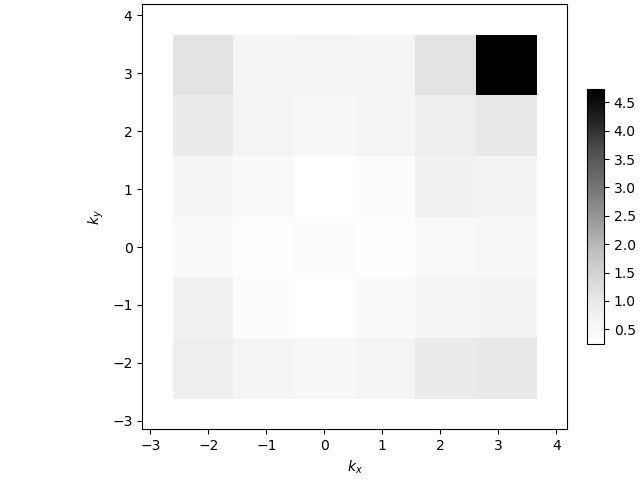

In [9]:
latt.plot_k(res_nosym.SpinT_eqK_sum)

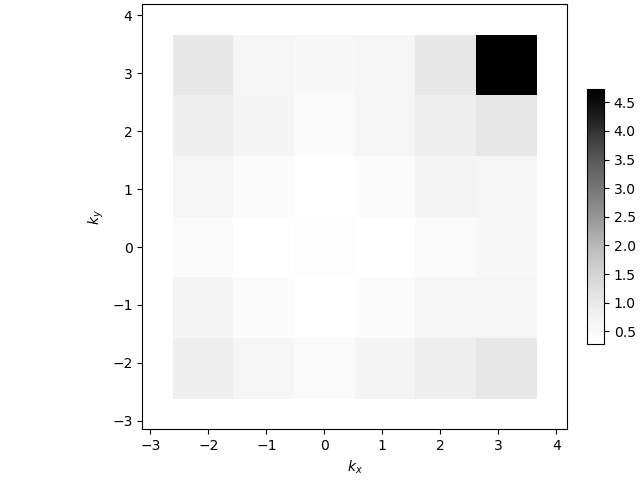

In [10]:
latt.plot_k(res_sym.SpinT_eqK_sum)